In [1]:
from pypylon import pylon
# https://pythonforthelab.com/blog/getting-started-with-basler-cameras/
import matplotlib.pyplot as plt
import time

tl_factory = pylon.TlFactory.GetInstance()
devices = tl_factory.EnumerateDevices()
for device in devices:
    print(device.GetIpAddress())


192.168.16.3
192.168.3.3
192.168.9.3
192.168.8.3
192.168.5.3


In [2]:
tl_factory = pylon.TlFactory.GetInstance()
camera = pylon.InstantCamera()
camera.Attach(tl_factory.CreateFirstDevice())

Size of image: (4608, 5328)


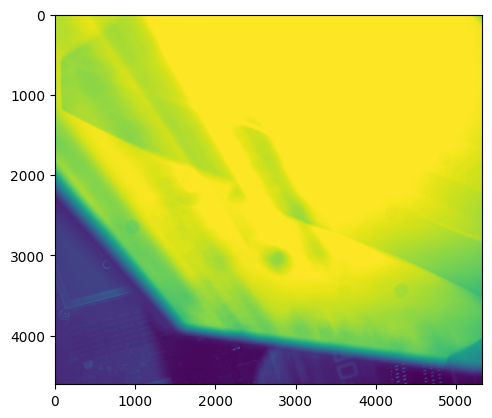

In [4]:
camera.Open()
camera.ExposureTime.SetValue(50000)
camera.StartGrabbing(1)
grab = camera.RetrieveResult(2000, pylon.TimeoutHandling_Return)
if grab.GrabSucceeded():
    img = grab.GetArray()
    print(f'Size of image: {img.shape}')
    plt.imshow(img)
camera.Close()